loss 0.417, train acc 0.876, test acc 0.812
606.0 examples/sec on cuda:0


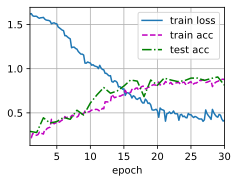

In [3]:
import torch
from torch import nn
from d2l import torch as d2l
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os
from PIL import Image

# 定义AlexNet
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc = nn.Sequential(
            nn.Linear(6400, 4096), nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096), nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 5)  # 改为类别数（5类宝可梦）
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


if __name__ == '__main__':
    # 数据预处理
    resize = 224
    transform = transforms.Compose([
        transforms.Resize((int(resize * 1.25), int(resize * 1.25))),
        transforms.RandomRotation(15),
        transforms.CenterCrop(resize),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])


    # 加载数据集
    dataset = datasets.ImageFolder('G:\\Thomas\\3_1_project\\data\\pokemon', transform=transform)
    num_classes = len(dataset.classes)
    print("类别映射：", dataset.class_to_idx)

    # 划分训练/验证集
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_db, val_db = random_split(dataset, [train_size, val_size])

    # DataLoader
    batch_size = 32
    train_iter = DataLoader(train_db, batch_size=batch_size, shuffle=True, num_workers=4)
    test_iter = DataLoader(val_db, batch_size=batch_size, shuffle=False, num_workers=4)

    # 初始化模型和参数
    lr, num_epochs = 0.001, 30
    net = AlexNet()
    device = d2l.try_gpu()
    print("使用设备：", device)

    # 开始训练
    d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, device)
